<a href="https://colab.research.google.com/github/gangasani-anusha/DeepLearning-Assignment3/blob/main/DeepLearning_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BackPropagation & GradientPropagation

### `Creating Environment`

In [1]:
!pip install pytorch-lightning

     |████████████████████████████████| 527 kB 5.0 MB/s 
     |████████████████████████████████| 952 kB 38.4 MB/s 
     |████████████████████████████████| 596 kB 35.4 MB/s 
     |████████████████████████████████| 134 kB 31.9 MB/s 
     |████████████████████████████████| 397 kB 6.0 MB/s 
     |████████████████████████████████| 829 kB 37.6 MB/s 
     |████████████████████████████████| 1.1 MB 18.4 MB/s 
     |████████████████████████████████| 94 kB 1.5 MB/s 
     |████████████████████████████████| 144 kB 35.3 MB/s 
     |████████████████████████████████| 271 kB 34.2 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=55de50b15fa2a627ca614cba94892f4fc675be4fa5a3ff2be4a9370ef4cd145a
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfull

In [2]:
!python --version

Python 3.7.12


In [3]:
!pip list | grep tensor

tensorboard                   2.8.0
tensorboard-data-server       0.6.1
tensorboard-plugin-wit        1.8.1
tensorflow                    2.8.0
tensorflow-datasets           4.0.1
tensorflow-estimator          2.8.0
tensorflow-gcs-config         2.8.0
tensorflow-hub                0.12.0
tensorflow-io-gcs-filesystem  0.24.0
tensorflow-metadata           1.7.0
tensorflow-probability        0.16.0


In [4]:
!pip list | grep torch

pytorch-lightning             1.5.10
torch                         1.10.0+cu111
torchaudio                    0.10.0+cu111
torchmetrics                  0.7.2
torchsummary                  1.5.1
torchtext                     0.11.0
torchvision                   0.11.1+cu111


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pytorch_lightning as pl
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from typing import Callable

### `Linear Regression & MSE`

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


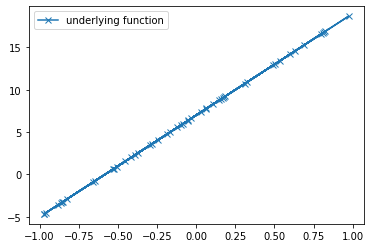

In [6]:
n = 50
d = 1
x = np.random.uniform(-1, 1, (n, d))
# y = 5x + 10
true_weights = np.array([[12],])
true_bias = np.array([7])

y_true = x @ true_weights + true_bias
print(f'x: {x.shape}, weights: {true_weights.shape}, bias: {true_bias.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

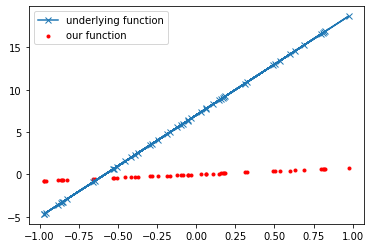

In [7]:
class Linear:
  def __init__(self, input_dim, num_hidden=1):
    self.wt = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    return x @ self.wt + self.bias

ln = Linear(d)
y_pred = ln(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

In [8]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()
  
loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 74.74894679182397


### `Back Propagation`

In [9]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.wt = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.wt + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.wt.T
    return self.x_gradient

  def update(self, lr):
    self.wt = self.wt - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [10]:
loss = MSE()
ln = Linear(d)
y_pred = ln(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
ln.backward(loss_gradient)
ln.update(0.5)
y_pred = ln(x)
print(loss(y_pred, y_true))

85.1457851251726
27.038100797298465


### `Gradient Descent`


Epoch 0, loss 86.21706121120742
Epoch 5, loss 33.50565260948407
Epoch 10, loss 16.878182073825677


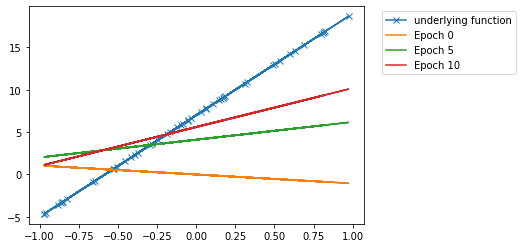

In [11]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
ln = Linear(d)

num_epochs = 15
lr = 0.1

for epoch in range(num_epochs):
  y_pred = ln(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  ln.backward(gradient_from_loss)
  ln.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

## Non-Linear Regression without PyTorch

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


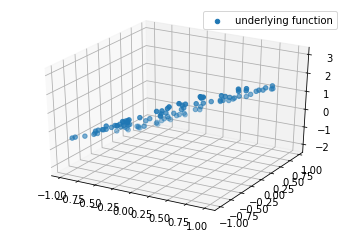

In [12]:
n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

true_weights = np.array([[2, -1], ]).T
true_bias = np.array([0.5])
print(x.shape, true_weights.shape, true_bias.shape)

y_true = x @ true_weights + true_bias
print(f'x: {x.shape}, weights: {true_weights.shape}, bias: {true_bias.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

3.4993348943100484


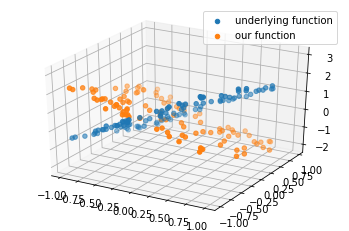

In [13]:
loss = MSE()
ln = Linear(2)
y_pred = ln(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 3.4993348943100484
Epoch 1, loss 3.0316625934950023
Epoch 2, loss 2.6271673857233537
Epoch 3, loss 2.2772066602490795
Epoch 4, loss 1.9743418780834299
Epoch 5, loss 1.7121651463376433
Epoch 6, loss 1.4851525362637048
Epoch 7, loss 1.2885394356801954
Epoch 8, loss 1.1182142448800394
Epoch 9, loss 0.9706274687211003
Epoch 10, loss 0.8427138135018182
Epoch 11, loss 0.7318253224383652
Epoch 12, loss 0.6356739158141785
Epoch 13, loss 0.552281966467735
Epoch 14, loss 0.47993975546240447
Epoch 15, loss 0.4171688285171028
Epoch 16, loss 0.3626904195609648
Epoch 17, loss 0.31539822977170473
Epoch 18, loss 0.27433495324327967
Epoch 19, loss 0.23867202748363578


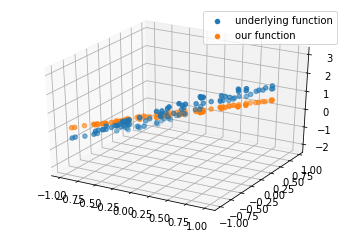

In [14]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=ln, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, ln(x))

### Multi-Layer Perceptron

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


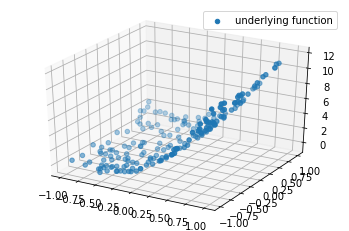

In [15]:
# Making non-linear data

n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

true_weights = np.array([[5, 1],]).T
true_bias = np.array([1])

y_true = (x ** 2) @ true_weights + x @ true_weights + true_bias
print(f'x: {x.shape}, weights: {true_weights.shape}, bias: {true_bias.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Epoch 0, loss 20.46415495465206
Epoch 1, loss 16.006708126246817
Epoch 2, loss 12.88545439322337
Epoch 3, loss 10.653342278636414
Epoch 4, loss 9.020324223942671
Epoch 5, loss 7.797146193407984
Epoch 6, loss 6.859409502971196
Epoch 7, loss 6.124573572516404
Epoch 8, loss 5.537222353375525
Epoch 9, loss 5.059610049973654
Epoch 10, loss 4.66558158813622
Epoch 11, loss 4.336652123215776
Epoch 12, loss 4.059469340268412
Epoch 13, loss 3.8241626927643777
Epoch 14, loss 3.623262658591953
Epoch 15, loss 3.450987301371003
Epoch 16, loss 3.3027663439035764
Epoch 17, loss 3.1749195350057984
Epoch 18, loss 3.0644358544655073
Epoch 19, loss 2.9688191348148587
Epoch 20, loss 2.8859778625659795
Epoch 21, loss 2.814144730735746
Epoch 22, loss 2.7518165283090252
Epoch 23, loss 2.6977081787788824
Epoch 24, loss 2.6507168225586555
Epoch 25, loss 2.609893187824763
Epoch 26, loss 2.5744183737680872
Epoch 27, loss 2.543584747150581
Epoch 28, loss 2.516780034873916
Epoch 29, loss 2.4934739507579
Epoch 30, l

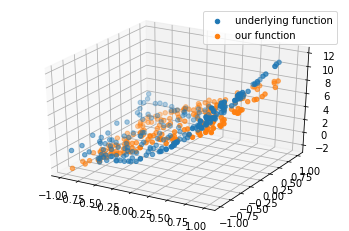

In [16]:
loss = MSE()
ln = Linear(d)
fit(x, y_true, model=ln, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, ln(x))

### Non-Linearity

In [17]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


### New Non-Linear Model

18.56114846262558


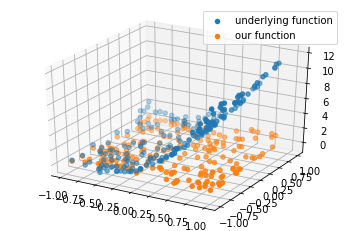

In [18]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.ln1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.ln2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.ln1(x)
    r = self.relu(l1)
    l2 = self.ln2(r)
    return l2
  
  def backward(self, output_gradient):
    ln2_gradient = self.ln2.backward(output_gradient)
    relu_gradient = self.relu.backward(ln2_gradient)
    ln1_gradient = self.ln1.backward(relu_gradient)
    # print('Model backward', ln2_gradient.shape, relu_gradient.shape, ln1_gradient.shape)
    # import pdb; pdb.set_trace()
    return ln1_gradient

  def update(self, lr):
    self.ln2.update(lr)
    self.ln1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [19]:
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

19.305870769156968
10.464975321370002


Epoch 0, loss 10.464975321370002
Epoch 1, loss 5.522626846623917
Epoch 2, loss 3.2601486928139334
Epoch 3, loss 2.3741638931222617
Epoch 4, loss 1.8636457024445736
Epoch 5, loss 1.5357232040614894
Epoch 6, loss 1.3078308581967721
Epoch 7, loss 1.1405307211408757
Epoch 8, loss 1.0020111513047991
Epoch 9, loss 0.8882609077844882
Epoch 10, loss 0.7924488278975633
Epoch 11, loss 0.7104693994851519
Epoch 12, loss 0.6375270427728943
Epoch 13, loss 0.5733146088550515
Epoch 14, loss 0.5166300858851459
Epoch 15, loss 0.4658465194204833
Epoch 16, loss 0.42116126534792814
Epoch 17, loss 0.3821685611737473
Epoch 18, loss 0.3481507432328436
Epoch 19, loss 0.31812312691874
Epoch 20, loss 0.2919253678418069
Epoch 21, loss 0.2690341850347858
Epoch 22, loss 0.24896734433258594
Epoch 23, loss 0.23145020643172765
Epoch 24, loss 0.2160725654424306
Epoch 25, loss 0.20265565691021756
Epoch 26, loss 0.19090755738331658
Epoch 27, loss 0.18059691425393024
Epoch 28, loss 0.17160415984825758
Epoch 29, loss 0.163

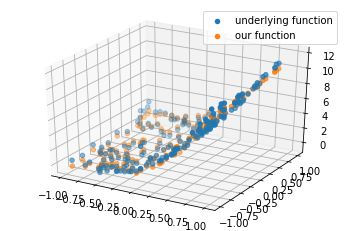

In [20]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x))

## Non-Linear Regression with PyTorch

In [21]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.ln1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.ln2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.ln1(x)
    r = self.relu(l1)
    l2 = self.ln2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(21.6801, grad_fn=<MseLossBackward0>)


In [22]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(21.6801, grad_fn=<MseLossBackward0>)
tensor(10.7441, grad_fn=<MseLossBackward0>)


tensor(10.7441, grad_fn=<MseLossBackward0>)
tensor(7.5938, grad_fn=<MseLossBackward0>)
tensor(5.2071, grad_fn=<MseLossBackward0>)
tensor(3.4424, grad_fn=<MseLossBackward0>)
tensor(2.3398, grad_fn=<MseLossBackward0>)
tensor(1.7150, grad_fn=<MseLossBackward0>)
tensor(1.3461, grad_fn=<MseLossBackward0>)
tensor(1.1277, grad_fn=<MseLossBackward0>)
tensor(0.9815, grad_fn=<MseLossBackward0>)
tensor(0.8725, grad_fn=<MseLossBackward0>)
tensor(0.7857, grad_fn=<MseLossBackward0>)
tensor(0.7123, grad_fn=<MseLossBackward0>)
tensor(0.6500, grad_fn=<MseLossBackward0>)
tensor(0.5975, grad_fn=<MseLossBackward0>)
tensor(0.5528, grad_fn=<MseLossBackward0>)
tensor(0.5139, grad_fn=<MseLossBackward0>)
tensor(0.4800, grad_fn=<MseLossBackward0>)
tensor(0.4502, grad_fn=<MseLossBackward0>)
tensor(0.4230, grad_fn=<MseLossBackward0>)
tensor(0.3982, grad_fn=<MseLossBackward0>)
tensor(0.3765, grad_fn=<MseLossBackward0>)
tensor(0.3573, grad_fn=<MseLossBackward0>)
tensor(0.3404, grad_fn=<MseLossBackward0>)
tensor(0.3

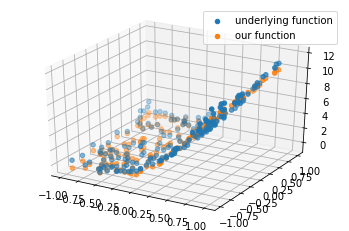

In [23]:
def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x_tensor).detach())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
 regression (Dense)          (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
7/7 [==============================] - 3s 4ms/step - loss: 7.1431
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 1.0136
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 1.0738
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 0.2453
Epoch 5/10
7/7 [

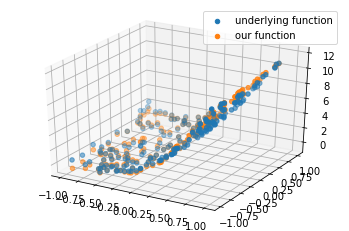

In [24]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))

##Using PyTorch-Lightning

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.datasets import MNIST
from torchvision import transforms
import pytorch_lightning as pl

class LitAutoEncoder(pl.LightningModule):
	def __init__(self):
		super().__init__()
		self.encoder = nn.Sequential(
      nn.Linear(28 * 28, 64),
      nn.ReLU(),
      nn.Linear(64, 3))
		self.decoder = nn.Sequential(
      nn.Linear(3, 64),
      nn.ReLU(),
      nn.Linear(64, 28 * 28))

	def forward(self, x):
		embedding = self.encoder(x)
		return embedding

	def configure_optimizers(self):
		optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
		return optimizer

	def training_step(self, train_batch, batch_idx):
		x, y = train_batch
		x = x.view(x.size(0), -1)
		z = self.encoder(x)    
		x_hat = self.decoder(z)
		loss = F.mse_loss(x_hat, x)
		self.log('train_loss', loss)
		return loss

	def validation_step(self, val_batch, batch_idx):
		x, y = val_batch
		x = x.view(x.size(0), -1)
		z = self.encoder(x)
		x_hat = self.decoder(z)
		loss = F.mse_loss(x_hat, x)
		self.log('val_loss', loss)

# data
dataset = MNIST('', train=True, download=True, transform=transforms.ToTensor())
mnist_train, mnist_val = random_split(dataset, [55000, 5000])

train_loader = DataLoader(mnist_train, batch_size=1024)
val_loader = DataLoader(mnist_val, batch_size=1024)

# model
model = LitAutoEncoder()

# training
trainer = pl.Trainer(gpus=1)
trainer.fit(model, train_loader, val_loader)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Missing logger folder: /content/lightning_logs

  | Name    | Type       | Params
---------------------------------------
0 | encoder | Sequential | 50.4 K
1 | decoder | Sequential | 51.2 K
---------------------------------------
101 K     Trainable params
0         Non-trainable params
101 K     Total params
0.407     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

## TensorFlow

### TensorFlow variants

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

n = 325
d = 3

In [ ]:

# x = Values used for generating the sample set
x = np.random.uniform(-1,1,(n,d)) 
weights_true = np.array([[5,9,4],]).T
bias_true = np.array([1])


In [ ]:
# Sample Set or TRUE VALUE
y_true = (x**2) @ weights_true + x@weights_true + bias_true
print(f'Dimensions: {d} , x shape: {x.shape} , Weights shape: {weights_true.shape}, Bias Shape: {bias_true.shape} , Number of Samples: {n} , Sample Set Shape: {y_true.shape}')

Dimensions: 3 , x shape: (325, 3) , Weights shape: (3, 1), Bias Shape: (1,) , Number of Samples: 325 , Sample Set Shape: (325, 1)


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


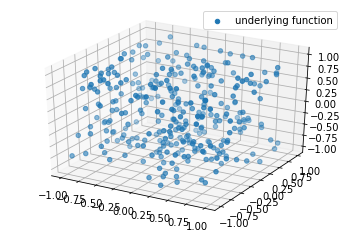

In [ ]:

def plot_4d(x, y, y_pred=None):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0],x[:, 1],x[:, 2],y_true, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0],x[:, 1],x[:, 2], y_pred, label='our function')
  plt.legend()

plot_4d(x, y_true)

### Built-in Layers

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [ ]:
inputs = keras.Input(shape=(3,))
l1 = layers.Dense(8, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

In [ ]:
model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

In [ ]:
model.fit(x, y_true, epochs=12)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


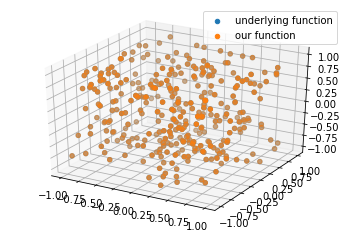

In [ ]:
y_pred = model.predict(x)
plot_4d(x, y_true, y_pred)

### Scratch

In [ ]:
try:
    import tensorflow as tf
except:
    print("You don't have tensorflow installed yet")
try:
    import numpy as np
except:
    print("You don't have numpy installed yet")
try:
    import matplotlib.pyplot as plt
except:
    print("You don't have matplotlib installed yet")
from IPython.display import display, clear_output, Markdown
clear_output()

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
# Consider equation: 2(x1^2)+3(x2^2)+5(x3^2)+1
a = 5
b = 4
c = 9

### Function: $$y=(5)x^4+(4)x^3+(9)x^2$$

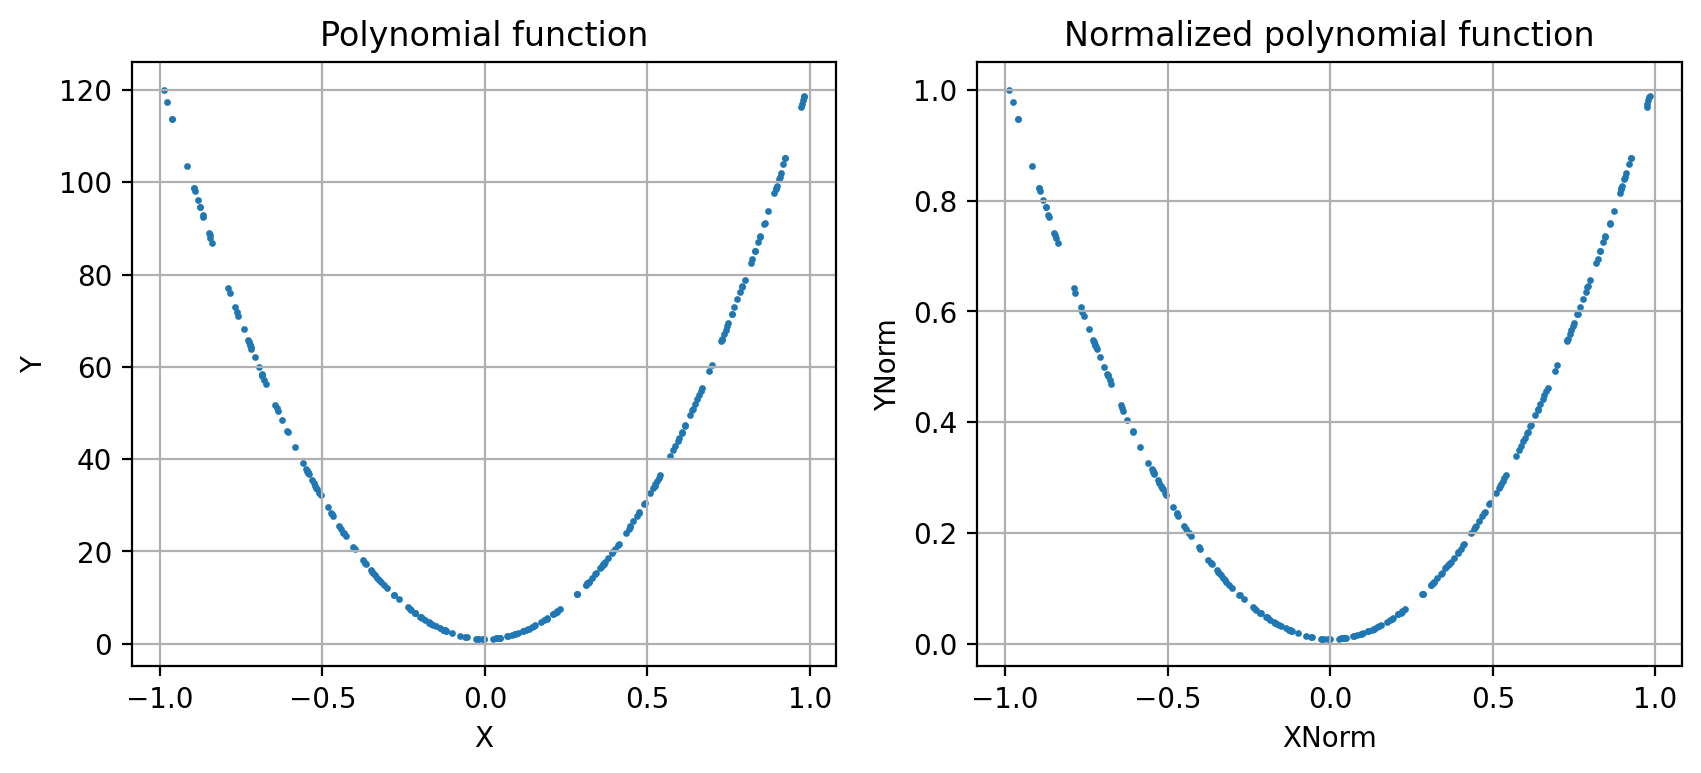

In [ ]:
display(Markdown("### Function: $$y=("+str(a)+")x^4+("+str(b)+")x^3+("+str(c)+")x^2$$"))
x = (np.random.rand(1, 250) -0.5)*2
y_raw = (a*x)**2 + (b*x)**2 + (c*x)**2 + 1
y = y_raw/np.max(y_raw)
fig, ax = plt.subplots(ncols=2, figsize=[10,4], dpi=200)
ax[0].scatter(x, y_raw, s=2, label="Original Data")
ax[1].scatter(x, y, s=2, label="Normalized Data")
ax[0].set_xlabel("X")
ax[1].set_xlabel("XNorm")
ax[0].set_ylabel("Y")
ax[1].set_ylabel("YNorm")
ax[0].set_title("Polynomial function")
ax[1].set_title("Normalized polynomial function")
ax[0].grid()
ax[1].grid()
plt.show()

### High Level API

In [ ]:
batch_size = 2
epochs = 20
hidden_units = 12

In [ ]:
# randomly splitting train/dev
indices = np.arange(0,x.shape[1])
np.random.shuffle(indices)
x_train = x[:,indices[:int(float(len(indices))*0.7)]]
x_test = x[:,indices[int(float(len(indices))*0.7):]]
y_train = y[:,indices[:int(float(len(indices))*0.7)]]
y_test = y[:,indices[int(float(len(indices))*0.7):]]
train_num_batches = int(float(x_train.shape[1])/batch_size)
test_num_batches = int(float(x_test.shape[1])/batch_size)
print("X Train shape: ", x_train.shape)
print("Y Train shape: ", y_train.shape)
print("X Test shape: ", x_test.shape)
print("Y Test shape: ", y_test.shape)

X Train shape:  (1, 175)
Y Train shape:  (1, 175)
X Test shape:  (1, 75)
Y Test shape:  (1, 75)


In [ ]:
## Input Tensors: one for X values and one fot Y values: 

xx = tf.placeholder(tf.float32, shape=[1, batch_size], name='x')
yy = tf.placeholder(tf.float32, shape=[1, batch_size], name='y')

## HIDDEN LAYER:
# Initializing Weights (W) and biases (b) for the hidden layer:

W1 = tf.Variable(tf.random_normal(dtype=tf.float32, shape=[hidden_units,1]), name='W1')
b1 = tf.Variable(tf.zeros((hidden_units,1)), tf.float32, name='b1')

# Compute the matrices multiplication and apply RELU (Rectified Linear Unit) activation:

z1 = tf.add(tf.matmul(W1, xx), b1)
a1 = tf.nn.relu(z1)

## OUTPUT LAYER:
# Initializing Weights (W2) and biases (b2):

W2 = tf.Variable(tf.random_normal(dtype=tf.float32, shape=[1,hidden_units]), name='W2')
b2 = tf.Variable(tf.zeros((1,1)), tf.float32, name='b2')

# Compute matrices multiplication and apply TANH (hyperbolic tan) activation to the output layer:
z2 = tf.add(tf.matmul(W2, a1), b2)
y_hat = tf.tanh(z2)

# Compute loss function (difference between predicted Y (Y_HAT) and real Y):
cost = tf.reduce_mean(tf.square(yy - y_hat))

# Setting up Gradient Descend Optimizer to backpropagate the error and update weights and biases to minimize loss:

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(cost, var_list=[W1,b1,W2,b2])

# This will initialize all variables and build the graph:
init = tf.global_variables_initializer()

Iteration number: 1740 of 1740

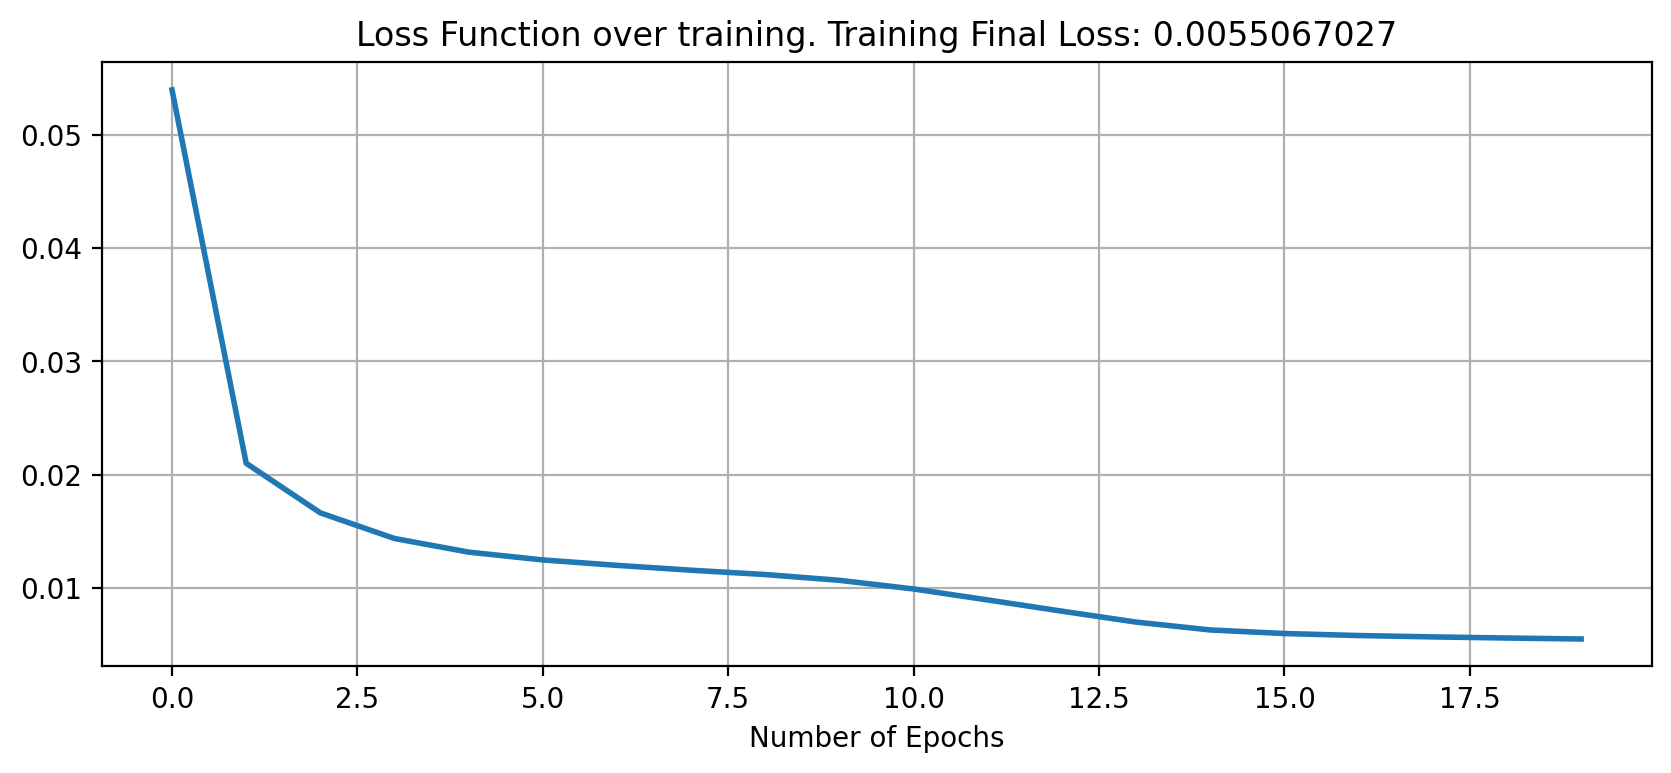

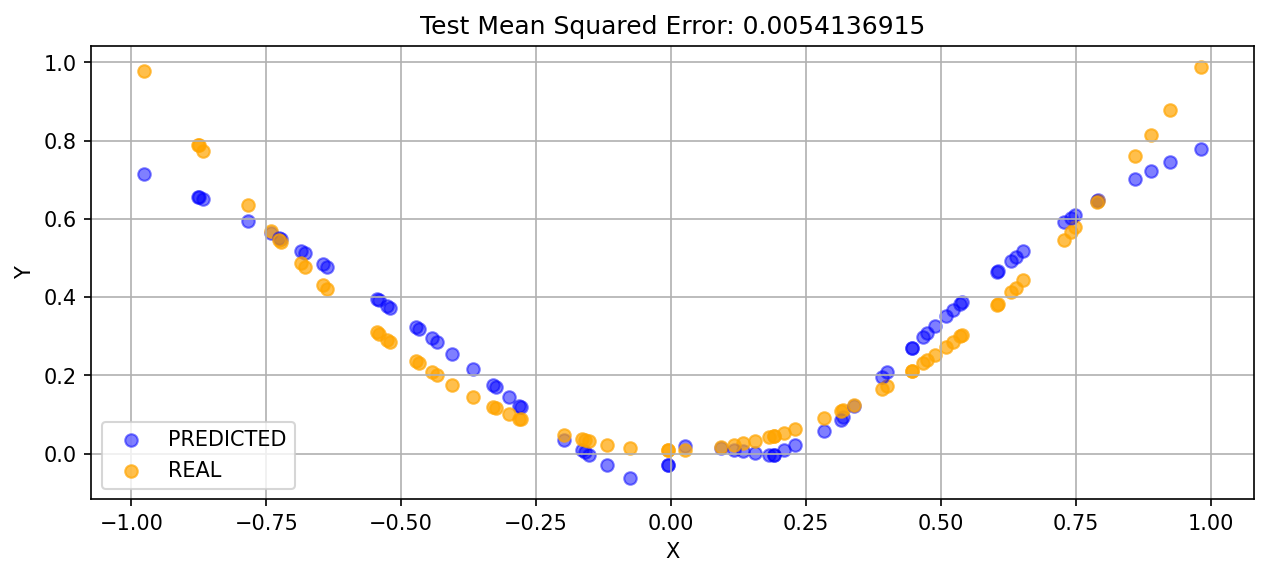

In [ ]:
slider = 0
slider_max = train_num_batches*epochs
losses = []
with tf.Session() as sess:
    sess.run(init)
    for m in range(0,epochs):
        loss = []
        for k in range(0,train_num_batches):
            x_batch = x_train[:, k*batch_size:k*batch_size+batch_size]
            y_batch = y_train[:, k*batch_size:k*batch_size+batch_size]
            sess.run(train, feed_dict={xx: x_batch, yy: y_batch})
            loss_ = sess.run(cost, feed_dict={xx: x_batch, yy: y_batch})
            loss.append(loss_)
            slider += 1
            clear_output(wait=True)
            display(Markdown("Iteration number: "+str(slider)+" of "+str(slider_max)))
        losses.append(np.mean(loss))
            
    plt.figure(figsize=[10,4], dpi=200)
    plt.plot(losses, linewidth=2)
    plt.title("Loss Function over training. Training Final Loss: "+str(losses[-1]))
    plt.grid()
    plt.xlabel("Number of Epochs")
    plt.show()
    plt.figure(figsize=[10,4], dpi=150)
    losses_test = []
    for k in range(test_num_batches):
        x_batch = x_test[:, k*batch_size:k*batch_size+batch_size]
        y_batch = y_test[:, k*batch_size:k*batch_size+batch_size]
        plt.scatter(x_batch[0], sess.run(y_hat, feed_dict={xx: x_batch})[0], c='blue', alpha=.5)
        plt.scatter(x_batch[0], y_batch[0], c='orange', alpha=.7)
        losses_test.append(sess.run(cost, feed_dict={xx: x_batch, yy: y_batch}))
    loss_test = np.mean(losses_test)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Test Mean Squared Error: "+str(loss_test))
    plt.grid()
    plt.legend(["PREDICTED", "REAL"])
    plt.show()